In [7]:
import numpy as np

# Image using function

In [57]:
pi = np.pi
def cosine_exp(x,y,fx,fy,a):
    return np.cos(2*pi*fx*x)*np.cos(2*pi*fy*y)*np.exp(-(x**2+y**2)/(2*a**2))

In [58]:
IMAGE_SIZE_X = 10
IMAGE_SIZE_Y = 10
xCenter = IMAGE_SIZE_X/2
yCenter = IMAGE_SIZE_Y/2
fx = 0
fy = 2
a = np.sqrt(0.5)

In [59]:
myfunction = cosine_exp

G_SIZE_REAL =  100
x = np.linspace(0,IMAGE_SIZE_X,G_SIZE_REAL) - xCenter
y = np.linspace(0,IMAGE_SIZE_Y,G_SIZE_REAL) - yCenter
G = np.zeros([G_SIZE_REAL, G_SIZE_REAL])

for i in range(G_SIZE_REAL):
    for j in range(G_SIZE_REAL):
        G[i,j] = myfunction(x[i],y[j],fx,fy,a)
        
G_fft = np.fft.fft2(G)
G_fft = np.fft.fftshift(G_fft)

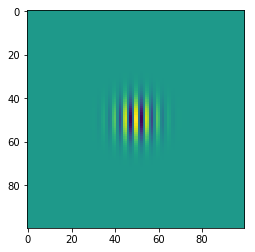

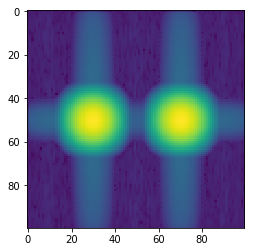

In [60]:
import matplotlib.pyplot as plt

plt.imshow(G)
plt.show()
plt.imshow(np.log(np.abs(G_fft)))
plt.show()

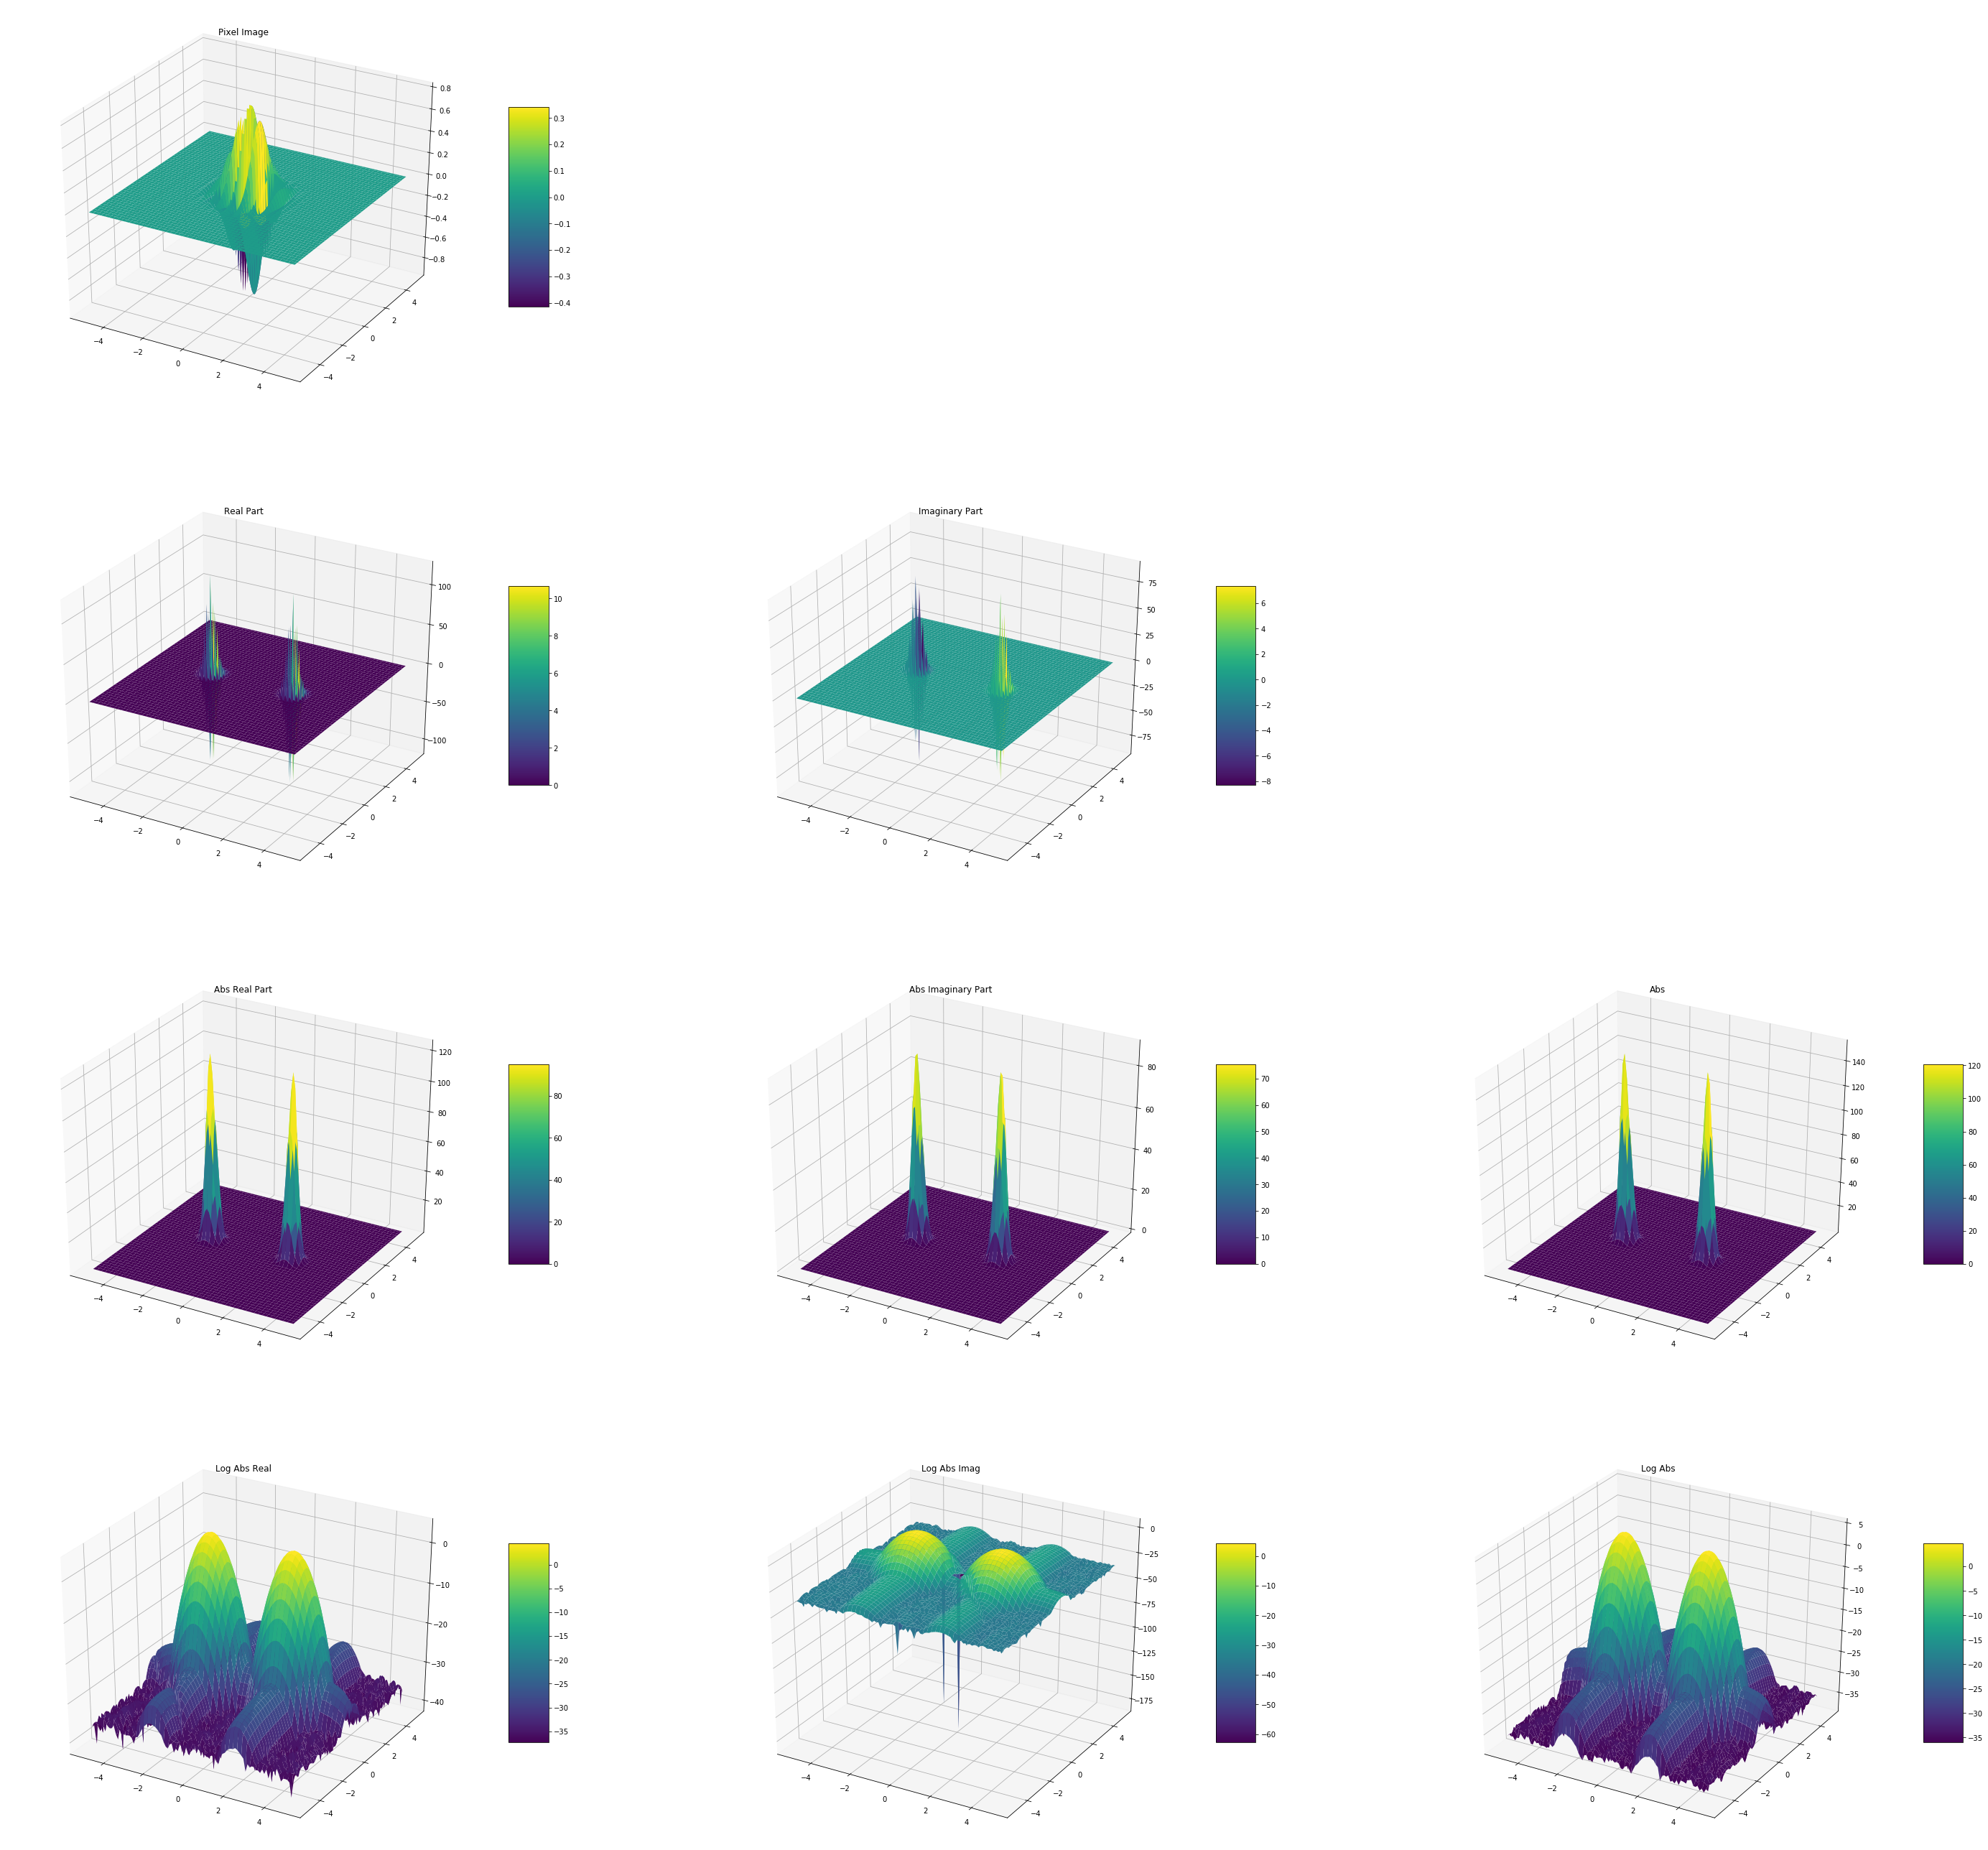

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(4, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Pixel Image")

####
####

# 3D plotting
ax = fig.add_subplot(4, 3, 4, projection='3d')

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 5, projection='3d')
## Plot the surface
surf = ax.plot_surface(X, Y, G_fft.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Imaginary Part")

#####

# 3D plotting
ax = fig.add_subplot(4, 3, 7, projection='3d')

G_real_abs_fft = np.sqrt(G_fft.real**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 8, projection='3d')
G_imag_abs_fft = np.sqrt(G_fft.imag**2)
## Plot the surface
surf = ax.plot_surface(X, Y, G_imag_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Imaginary Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 9, projection='3d')

G_abs_fft = np.sqrt(G_fft.real**2+G_fft.imag**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs")
                    
# 3D plotting
ax = fig.add_subplot(4, 3, 10, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.real**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Real")

# 3D plotting
ax = fig.add_subplot(4, 3, 11, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Imag")

# 3D plotting
ax = fig.add_subplot(4, 3, 12, projection='3d')

G_log_abs_fft = np.log(np.sqrt(G_fft.real**2+G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_log_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs")  

fig.set_figheight(47)
fig.set_figwidth(50)

plt.show(fig)

In [62]:
print(np.max(G_fft.imag), np.min(G_fft.imag))

90.135199773 -90.135199773


In [63]:
def myfft2(I):
    fft = np.zeros(I.shape, dtype = np.complex)
    
    for u in range(fft.shape[0]):
        for v in range(fft.shape[1]):
            #print('u,v: %i,%i'%(u,v))
            for i in range(I.shape[0]):
                for j in range(I.shape[1]):
                    fft[u,v] += I[i,j]*np.exp(-1j*2*np.pi*(i*u/(I.shape[0])+j*v/(I.shape[1])))
                    
    return fft
G_myfft = myfft2(G)
G_myfft = np.fft.fftshift(G_myfft)
#print(G_myfft)
plt.imshow(np.log(np.abs(G_myfft)))
plt.show()

KeyboardInterrupt: 

In [ ]:
# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(4, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Pixel Image")

####
####

# 3D plotting
ax = fig.add_subplot(4, 3, 4, projection='3d')

## Plot the surface.
surf = ax.plot_surface(X, Y, G_myfft.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 5, projection='3d')
## Plot the surface
surf = ax.plot_surface(X, Y, G_myfft.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Imaginary Part")

#####

# 3D plotting
ax = fig.add_subplot(4, 3, 7, projection='3d')

G_real_abs_fft = np.sqrt(G_myfft.real**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 8, projection='3d')
G_imag_abs_fft = np.sqrt(G_myfft.imag**2)
## Plot the surface
surf = ax.plot_surface(X, Y, G_imag_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Imaginary Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 9, projection='3d')

G_abs_fft = np.sqrt(G_myfft.real**2+G_fft.imag**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs")
                    
# 3D plotting
ax = fig.add_subplot(4, 3, 10, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_myfft.real**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Real")

# 3D plotting
ax = fig.add_subplot(4, 3, 11, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_myfft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Imag")

# 3D plotting
ax = fig.add_subplot(4, 3, 12, projection='3d')

G_log_abs_fft = np.log(np.sqrt(G_myfft.real**2+G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_log_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs")  

fig.set_figheight(47)
fig.set_figwidth(50)

plt.show(fig)

# Model

In [64]:
# basis function
def cosine_exp_fft(u,v,fx,fy,l):
    a = 2*np.pi*fx
    b = 2*np.pi*fy
    c = 1./(2*l**2)
    
    return np.exp(-((a+2*np.pi*u)**2+(b+2*np.pi*v)**2)/(4*c))*(1+np.exp(2*a*np.pi*u/c))*(1+np.exp(2*b*np.pi*v/c))*np.pi

In [65]:
G_SIZE_MODEL =  100
factor = (IMAGE_SIZE_X*IMAGE_SIZE_Y/G_SIZE_MODEL)
#factor = 1

G_fft_model = np.zeros((G_SIZE_MODEL,G_SIZE_MODEL),dtype=np.complex128)

u = np.linspace(0,IMAGE_SIZE_X,G_SIZE_MODEL) - xCenter
u = u/factor
v = np.linspace(0,IMAGE_SIZE_Y,G_SIZE_MODEL) - yCenter
v = v/factor

for i in range(G_SIZE_MODEL):
    for j in range(G_SIZE_MODEL):
        G_fft_model[i,j] = cosine_exp_fft(u[i],v[i],fx,fy,a)

** Definir una función, graficar ambas y calcular la anti transformada numérica. Para entender como funciona la FFT de numpy. **

*Probar con cosine y exponential.*

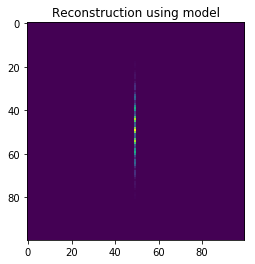

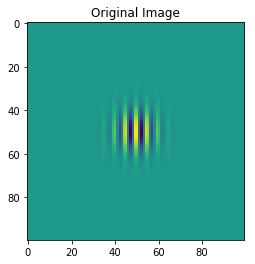

In [66]:
from scipy import ndimage

G_model = np.fft.ifft2(G_fft_model)
G_model = np.fft.fftshift(G_model)
G_model.real = ndimage.rotate(G_model.real, 90*2)
G_model.imag = ndimage.rotate(G_model.imag, 90*2)
plt.imshow(np.abs(G_model))
plt.title('Reconstruction using model')
plt.show()

plt.imshow(G)
plt.title('Original Image')
plt.show()

In [67]:
coef = np.max(G)/np.max(np.abs(G_model))
dx = x[1]-x[0]
du = u[1]-u[0]
print(coef)
print(dx)
print(du)
print(dx/du)
print(dx**2*coef)

603393228.716
0.10101010101
0.10101010101
1.0
6156445.55368
